In [4]:
!git remote add origin "https://github.com/oscardenas17/DataSetAdult-ML.git"
!git branch -M main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


##Adquisición y Adecuación en dataset ADULT

##Importar librerias a usar


In [ ]:

import pandas as pd ## manipulación y el análisis de datos 
import numpy as np ## cálculo numérico 
#Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from seaborn import boxplot


In [ ]:
##creación del dataFrame y lectura del dataSet

COLUMNS2 = ['age', 'workclass',
            'fnlwgt', 'education',
            'education_num','marital-status','occupation',
            'relationship', 'race','sex',
            'capital_gain','capital_loss','hours_week',
            'native_country','salary']
df = pd.read_csv('adult.data.csv', names=COLUMNS2)

##DataSet de pruebas
dfTest = pd.read_csv('adult.data.csv', names=COLUMNS2)
nRow, nCol = df.shape

##Miramos cuantas filas y columnas tiene el dataset
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 32561 filas y 15 columnas


##Mostrar una visualización de la tabla con datos importados:
En dicha tabla se puede observar la edad,el tipo de empleo y otros aspectos sobre la educación, su estado civil y temas de su economia.

In [ ]:
##Visualizamos los primeros 10 registros del dataFrame
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
##Información sobre la estructura de la tabla()  
##Se pueden ver tipos de datos y conocer si existen columnas con data faltante
df.info()

##El dataset no contiene valores vacios y tiene variables categóricas y númericas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##Visualizar el número de elementos distintos o únicos

In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_week           94
native_country       42
salary                2
dtype: int64

##Cálculo estádistico rápido

In [ ]:
##con .T se intercambian labels

##Podemos ver una edad minina de 17, máxima de 90 años en las personas de las que se obtuvo la información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<Axes: xlabel='salary', ylabel='count'>

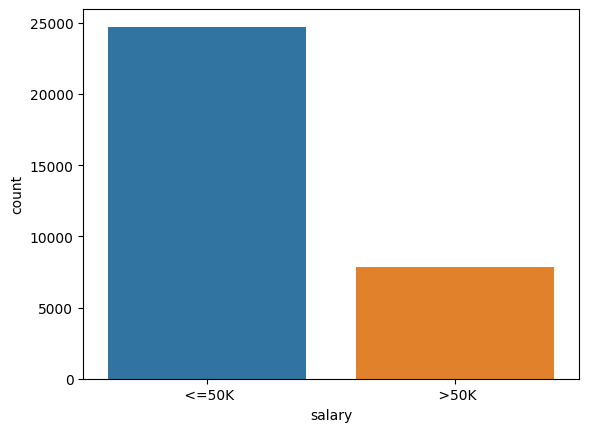

In [ ]:
##Visualizaciòn sobre la columena de ingresos 
#sns.displot(x='salary',data=df, aspect=3, height=4 )
sns.countplot(x='salary',data=df )

##La mayor cantidad de población se encuentra con ganancia al año inferiores de los 50K

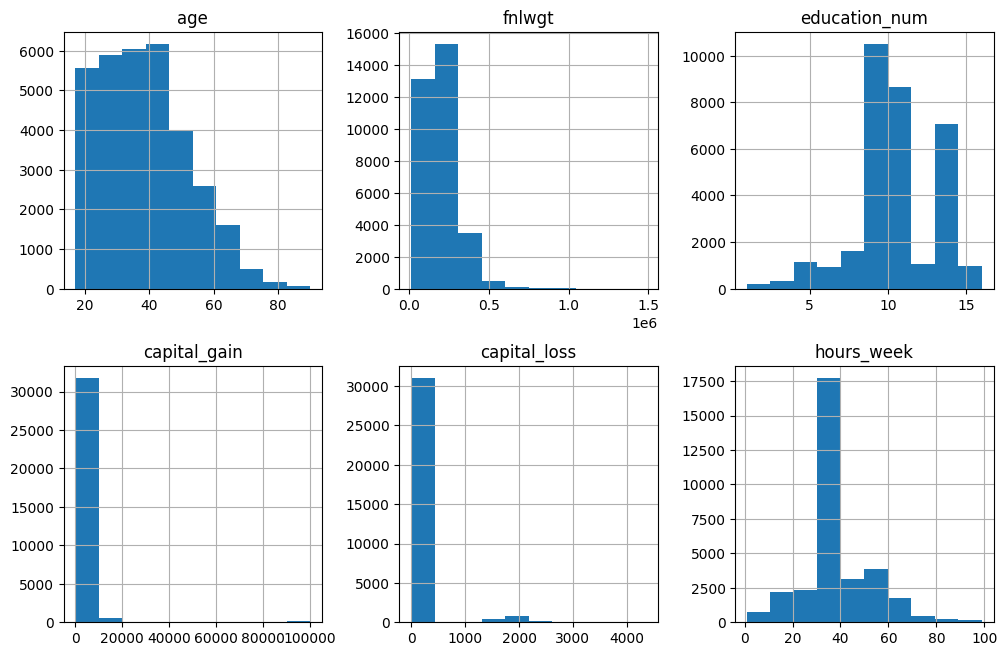

In [ ]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

# Visualización con histograma de seaborn - Código tomado de clase 

Grilla de ploteo con matplotlib organizandi las gŕaficas generadas con seaborn


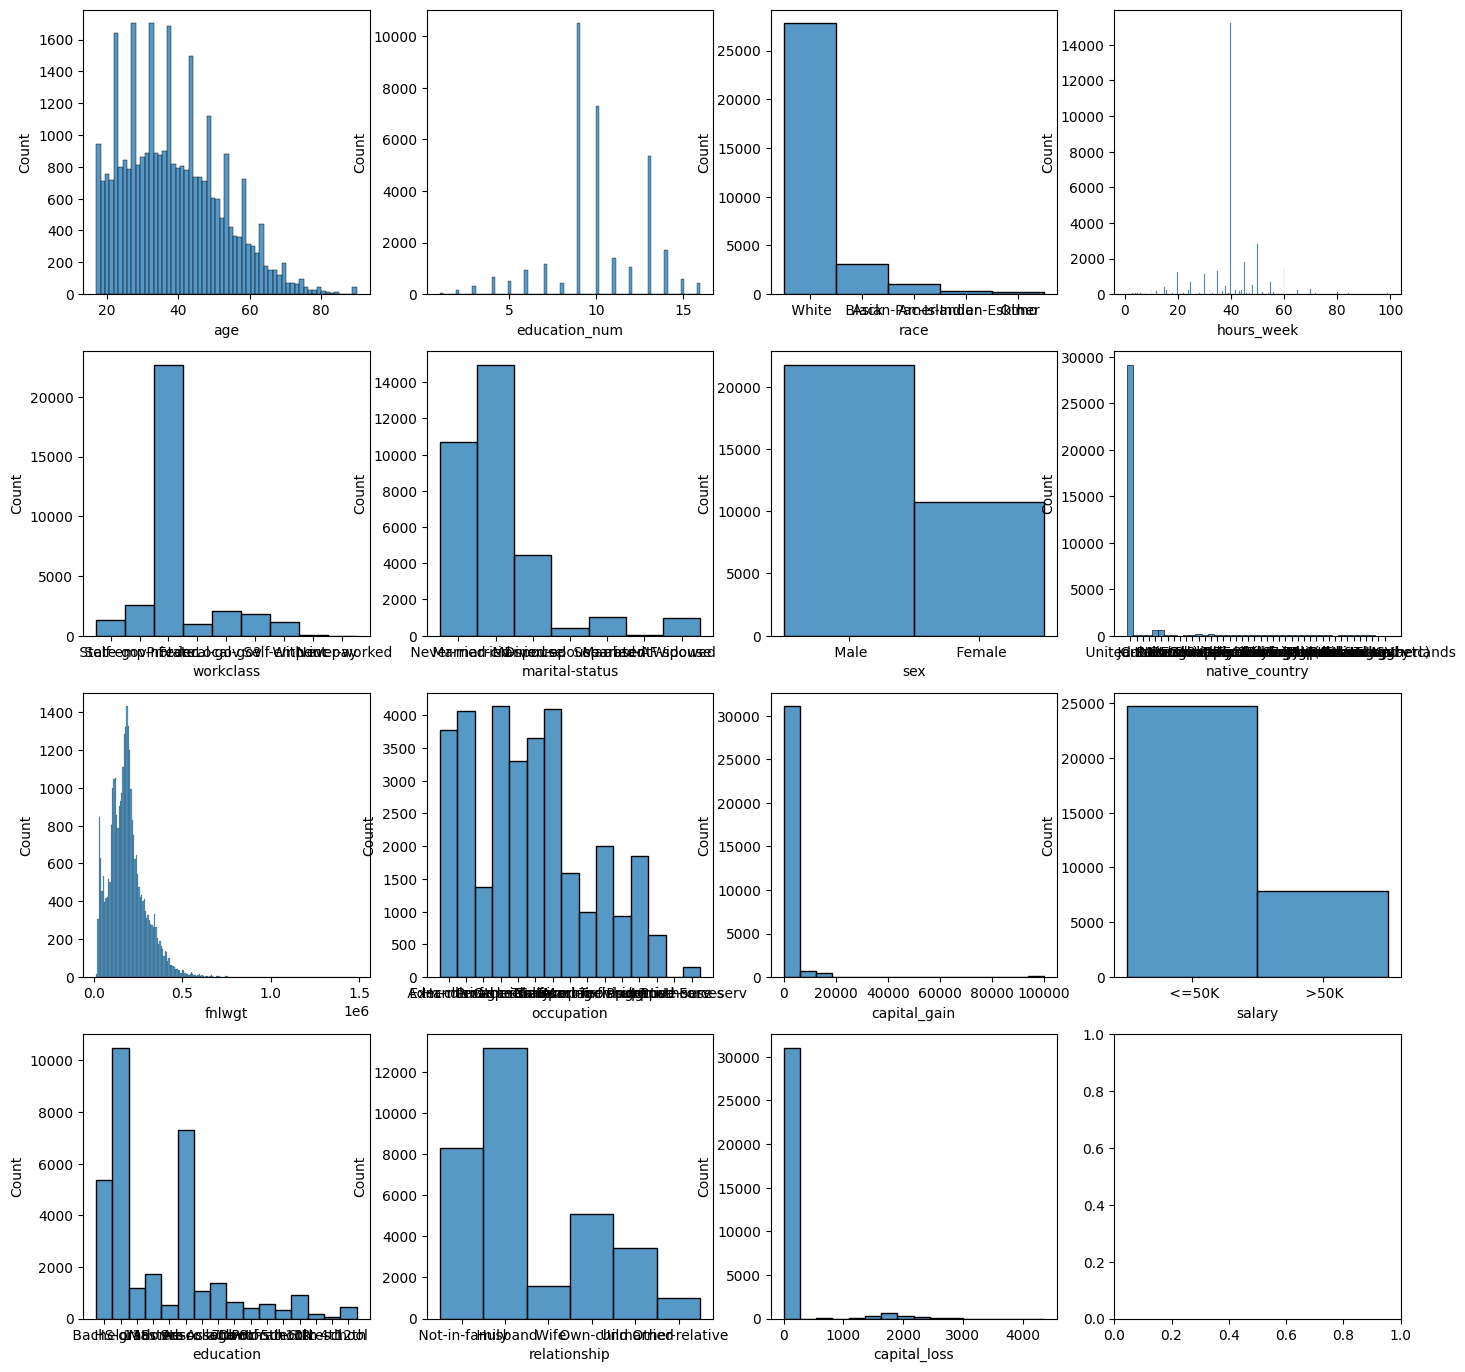

In [ ]:
#Creación de dos variables que invocan el método subplots para darle el ancho y alto al gŕaficoi
fig,ax = plt.subplots(4,4, figsize= (17,17))

#Variable Características para relacionar los headers en na lista
caracteristicas = list(df.columns)
i,j= 0,0

#Se realiza un búcle para cada columna y que en ella se implemente el gŕafico .hisplot
for caracteristica in caracteristicas: 
  sns.histplot(x=caracteristica, data= df, ax= ax[i][j])
  i+=1
  if i>=4:
    i=0
    j+=1
##Mostrar gráfica
#ax.tick_params(axis='x', labelrotation=45)
#plt.xticks(rotation=45)
#fig.autofmt_xdate(rotation=45)
#plt.grid(True)
plt.show()    

##Relacionar dos variables para validar la relación y si influyen en obtener ingresos superiores a 50K


(-0.5, 1.5, 18.0, 100.0)

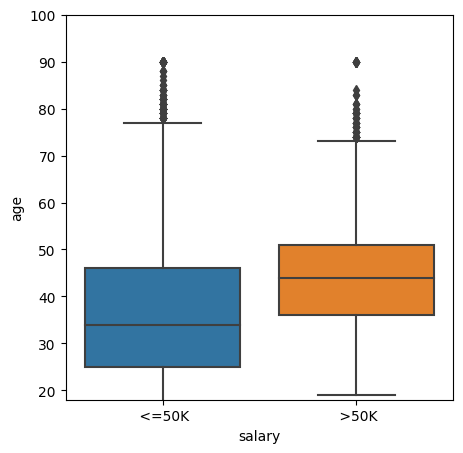

In [ ]:
## salary < 50K =0 - salary > 50K =1
##variable ingreso que contiene el salary, para relacionar en el gráfico cada dato de la otra  variable a analizar y comparar con el resuldato de esa fila.
ingreso = 'salary'

#Caracteristicas del gráfico
f,ax = plt.subplots(figsize=(5,5))

#Creación de la gráfica
fig = sns.boxplot(x=ingreso, y= "age", data= df)

#limites para los ejes
fig.axis(ymin=18, ymax=100)

##Se puede deducir que para obetenr mayores ingresos el tener mas edad facilita sea posible


##Visualización de Ingresos vs otras variables

<Axes: xlabel='salary', ylabel='count'>

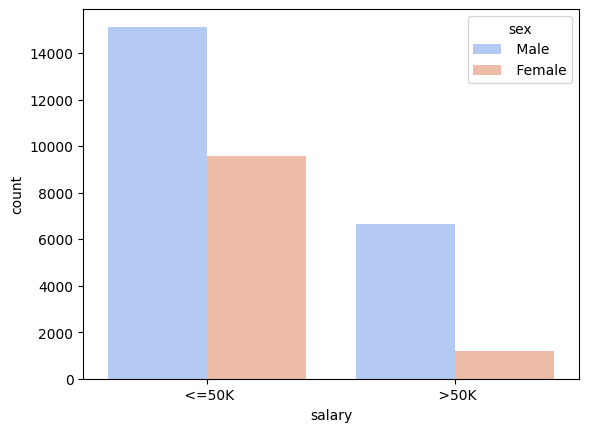

In [ ]:
#Ingreso vs sex
sns.countplot(data= df, x=df['salary'], palette="coolwarm", hue="sex")

<Axes: xlabel='salary', ylabel='count'>

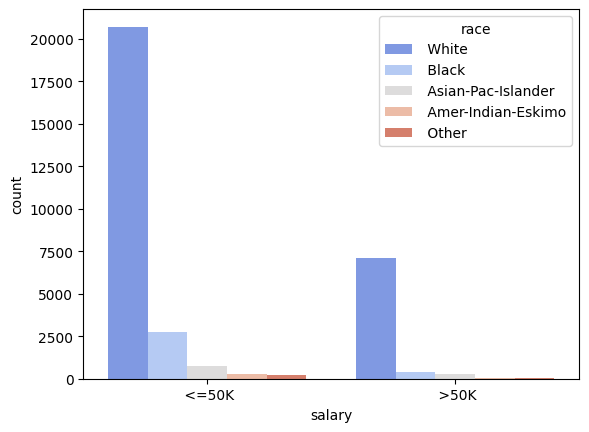

In [ ]:
#Ingreso vs race
sns.countplot(data= df, x=df['salary'], palette="coolwarm", hue="race")

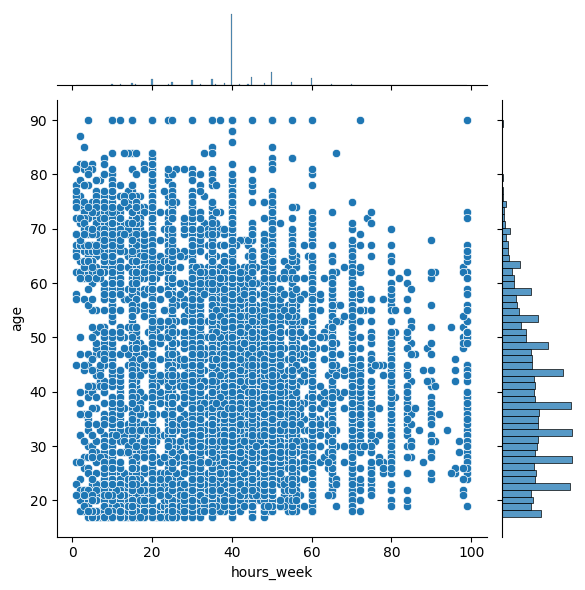

In [ ]:
ax = sns.JointGrid(data = df,
                   x = "hours_week",
                   y = "age")
                   
ax.plot(sns.scatterplot, sns.histplot)

# Visualizando regresion lineal en los datos
Relaciones entre variables con regresión lineal

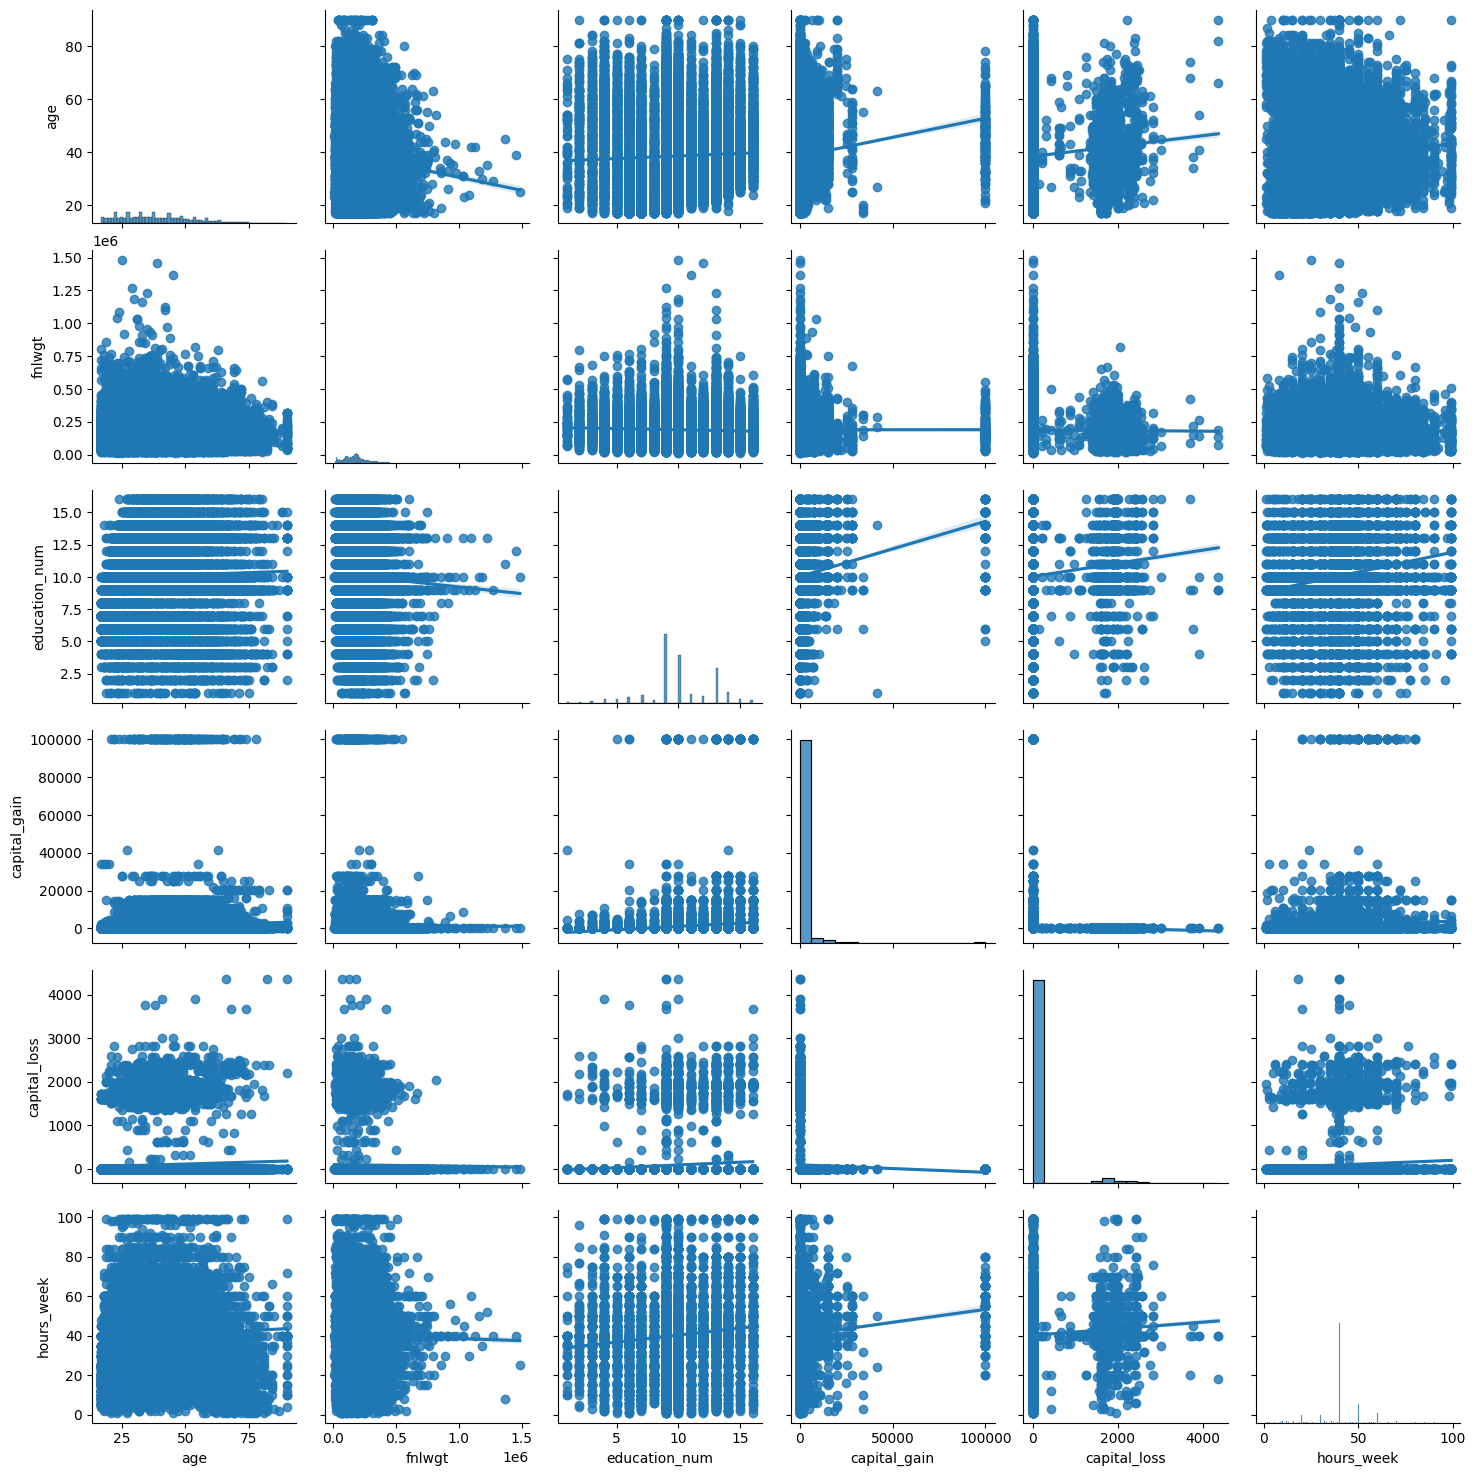

In [ ]:
sns.pairplot(df, kind="reg")
## relacionar variables entre si  y resaltar color en relacion al resultado 1 o 0 - sns.pairplot(db, diag_kind= "kde", hue= "salary")

##Averiguar campos en 0 o nulas

In [ ]:
## No hay valores nulos, pero de igual manera hay que revisar que los datos que se contienen sean adecuados, ya se encuentran valores con interrogantes
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_week        0
native_country    0
salary            0
dtype: int64

# Estudio de variables cat
##Validación con conteo de información en las columnas donde se evidencian datos erroneos identificados, marcados como ?



In [ ]:
##Se evidencia que existen 1836 filas en donde workclass no tiene una información adecuada
# 1843 filas no tienen información adecuada en la columna occupation
## Hay 583 filas que no tienen el dato del país nativo
categorias = [i for i in df.columns if df[i].dtypes == "O"]

In [ ]:
for caracteristica in categorias:
    print(f" {caracteristica}  :  {len(df[caracteristica].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native_country  :  42
 salary  :  2


In [ ]:
## Recorrer todas las variables identificadas como categoricas para vakidar cuales tienen valores incorrectos llenados como ?
for caracteristica in  categorias:
    print(df[caracteristica].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 

# Manejo de valores perdidos en características categóricas

Las columnas workclass, occupation y native_country contienen datos diligenciados con el signo ?, para complementar esa información serán llenados con la moda de cada uno de ellos.

In [ ]:
#reemplazamos los ? con la moda
df['workclass'] = df['workclass'].str.replace('?', 'Private' ,regex = True)
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' ,regex = True)
df['native_country'] = df['native_country'].str.replace('?', 'United-States' ,regex = True)

In [ ]:
#En la categoria de la columna de education, se pueden hacer ciertos arreglos para mantener mas uniformidad, lo mismo ocurre con las categorias de education, marital-status	

df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True ,regex = True)
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' , inplace = True ,regex = True)


In [ ]:
##Estado civil también se puede llevar a menos categorias
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married',inplace = True ,regex = True)

df['marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other' ,inplace = True ,regex = True)


In [ ]:
##Los ingresos menores y superiores se pueden binarizar

df["salary"] = df["salary"].replace({'<=50K' : 0 , ">50K" : 1 } ,regex = True)


##Mapa de calor para identificar correlaciones entre variables, habiendo pasado el ingreso a 1 y 0

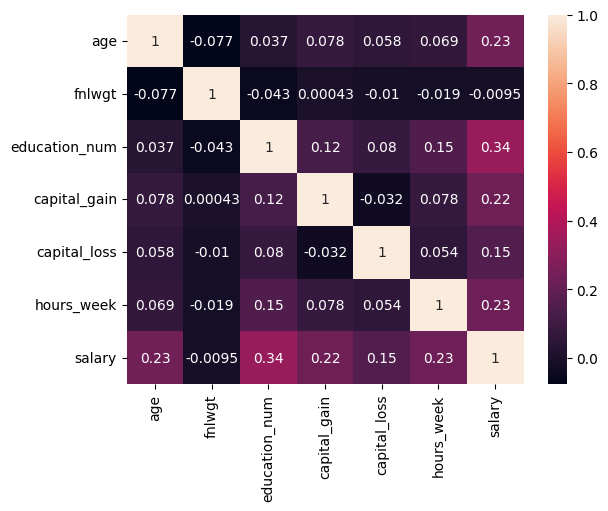

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.info()
#Convertir el tipo de dato del salario de object a #
df['salary'].astype('float64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name: salary, Length: 32561, dtype: float64

In [ ]:
##Identificamos si los cambios en las variables categoricas fueron realizados
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


Anteriormente teniamos esta información en las categorias, después de el tratamiento podemos ver como queda en la siguiente linea

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native_country  :  42
 income  :  2

In [ ]:
for caracteristica in categorias:
    print(f" {caracteristica}  :  {len(df[caracteristica].unique())}")

 workclass  :  8
 education  :  6
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 sex  :  2
 native_country  :  41
 salary  :  2


# Gráficos

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_week'}>,
        <Axes: title={'center': 'salary'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

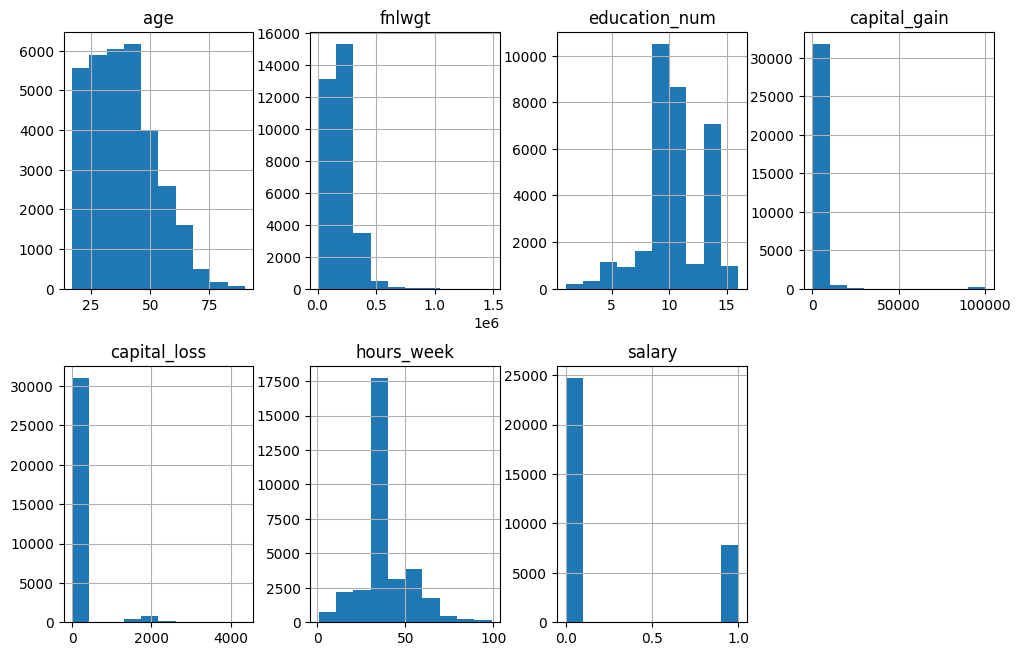

In [ ]:
#Histograma
df.hist(figsize=(12,12) ,layout=(3,4), sharex=False )


age                 Axes(0.125,0.653529;0.168478x0.226471)
fnlwgt           Axes(0.327174,0.653529;0.168478x0.226471)
education_num    Axes(0.529348,0.653529;0.168478x0.226471)
capital_gain     Axes(0.731522,0.653529;0.168478x0.226471)
capital_loss        Axes(0.125,0.381765;0.168478x0.226471)
hours_week       Axes(0.327174,0.381765;0.168478x0.226471)
salary           Axes(0.529348,0.381765;0.168478x0.226471)
dtype: object

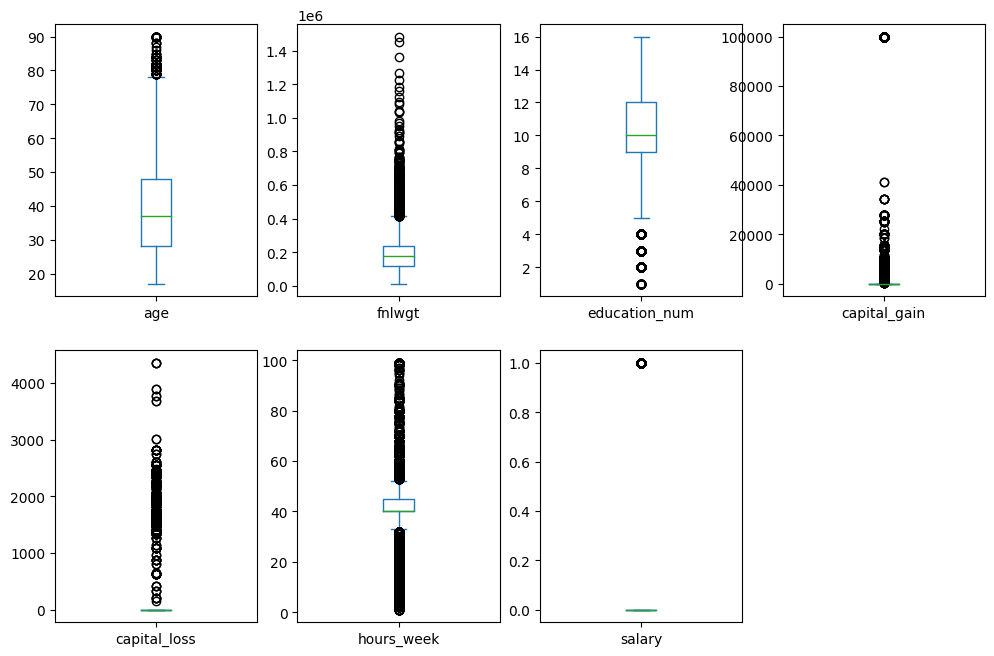

In [ ]:
#BOXPLOT
df.plot( kind="box" , figsize=(12,12) ,layout=(3,4), sharex=False, subplots=True )

In [ ]:
#Pie
px.pie(df, values="education_num", names="education", title="% en estudios", color_discrete_sequence=px.colors.qualitative.T10)

# Creación del Modelo

In [ ]:
#asignar variable X .  independientes
#[:, :-1] = Todas las filas excepto la última columna
# x = df.drop(['salary'], axis=1)
X= df.iloc[:, :-1].values
print(X[0])
#Asignar variable Y - dependiente
##[:, 14] = Todas las filas y la ultima columna   ó  y = df[" salary"]
y= df.iloc[:, 14].values
print(y[0]) 

[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States']
0


#Codificar datos categóricos
Escalado en variables 

In [ ]:
#Para codificar datos categóricos  se utiliza:
#Se hace con el fin de asignar un valor númerico a una categoria por ejemplo reemplazar provate a 1 y que ese 1 sea ahora el nuevo valor
from sklearn.preprocessing import StandardScaler, LabelEncoder
df2= df.copy()
df2 = df2.apply(LabelEncoder().fit_transform)
df2.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,salary
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [ ]:
##StandarScaler - Ajustar el conjunto de datos 
#escalar - estandarizar datos de entrenamiento y prueba. 
# proceso de reescalar los atributos para que tengan media de 0 y varianza de 1
std = StandardScaler().fit(df2.drop('salary', axis=1))

In [ ]:
#Luego del ajuste, sigue la transformaciñon
X= std.transform(df2.drop('salary', axis=1))
y= df['salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regresion = LogisticRegression()

model = regresion.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Precisión en dato de entrenamiento: {:,.3f}".format(regresion.score(X_train, y_train)))
print("recisión en datos de test: {:,.3f}".format(regresion.score(X_test, y_test)))

Precisión en dato de entrenamiento: 0.824
recisión en datos de test: 0.826


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomfc = RandomForestClassifier()

model1 = randomfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(randomfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(randomfc.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.860


# Citas

Diferencia entre fit_transform() y transform() en Scikit-Learn. (s/f). Comunidad Huawei Enterprise. Recuperado el 9 de abril de 2023, de https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757


Machine Mantra [@Machine_Mantra]. (2020, septiembre 4). Census income dataset python | UCI Adult dataset (part 2)| how to build a model in machine learning. Youtube. https://www.youtube.com/watch?v=kEPYo45n51M

